In [1]:
from ipywidgets import Button
from tkinter import Tk, filedialog
from IPython.display import clear_output, display

def select_files(b):
    clear_output()
    root = Tk()
    root.withdraw()                                        # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True)   # Raise the root to the top of all windows.
    b.files = filedialog.askopenfilename(multiple=True)    # List of selected files will be set button's file attribute.
    print(b.files)                                         # Print the list of files selected.
    
fileselect = Button(description="File select")
fileselect.on_click(select_files)

display(fileselect)

('D:/jupyter_notebooks/Edusecrets/data/L3/spec_100.00.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_102.63.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_105.26.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_107.89.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_110.53.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_113.16.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_115.79.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_118.42.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_121.05.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_123.68.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_126.32.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_128.95.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_131.58.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_134.21.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_136.84.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_139.47.dat', 'D:/jupyter_notebooks/Edusecrets/data/L3/spec_142.11.da

Plotting file:  spec_100.00.dat
Plotting file:  spec_102.63.dat
Plotting file:  spec_105.26.dat
Plotting file:  spec_107.89.dat
Plotting file:  spec_110.53.dat
Plotting file:  spec_113.16.dat
Plotting file:  spec_115.79.dat
Plotting file:  spec_118.42.dat
Plotting file:  spec_121.05.dat
Plotting file:  spec_123.68.dat
Plotting file:  spec_126.32.dat
Plotting file:  spec_128.95.dat
Plotting file:  spec_131.58.dat
Plotting file:  spec_134.21.dat
Plotting file:  spec_136.84.dat
Plotting file:  spec_139.47.dat
Plotting file:  spec_142.11.dat
Plotting file:  spec_144.74.dat
Plotting file:  spec_147.37.dat
Plotting file:  spec_150.00.dat


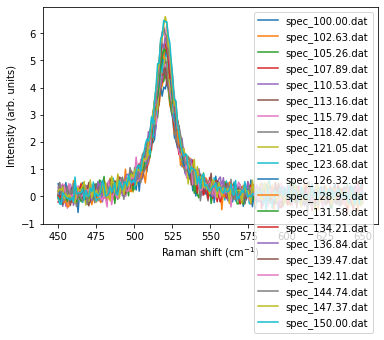

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

f = fileselect.files

for i in range(0,len(f)):
    dataread = pd.read_csv(f[i], header=None, sep=None, engine="python").values
    xdata = dataread[:,0]
    ydata = dataread[:,1]
    
    head,tail = os.path.split(f[i])          # Split the path+filename to head (path) and tail (filename)
    print("Plotting file: ", tail)           # Printing the filename that is being plotted in the memory
    plt.plot(xdata,ydata,label=tail)         # Plot the y vs. x data for file ith file in list 'f'
    
plt.legend()
plt.xlabel("Raman shift (cm$^{-1}$)")
plt.ylabel("Intensity (arb. units)")
plt.show()
    

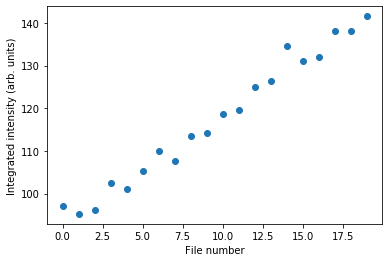

In [10]:
f = fileselect.files
areas = np.zeros(len(f))                 # Define 'areas' array filled with 0s, length = to number of files
filenos = np.zeros(len(f))               # Define 'filenos' array filled with 0s, length = to number of files

for i in range(0,len(f)):
    dataread = pd.read_csv(f[i], header=None, sep=None, engine="python").values
    xdata = dataread[:,0]
    ydata = dataread[:,1]
    
    filenos[i] = i
    areas[i] = np.trapz(ydata,xdata)
    
plt.scatter(filenos,areas)    
plt.xlabel("File number")
plt.ylabel("Integrated intensity (arb. units)")
plt.show()
    